In [1]:
import pandas as pd
import numpy as np
import sys
sys.path.append("/home/marcos/computacion/metodos_numericos_2c_2024/film-genre-classifier/film-classifier/")
from knn import *
from variables import *
from data_preprocessing import *
from cross_validation import *
import matplotlib.pyplot as plt


# 3.a
k = 5

80/20 train/test

In [38]:
K = 300
Q = 5000
X_train, y_train, X_test, y_test = document_term_matrix(import_data(), Q)
X_train = normalize_data(X_train)
X_test = normalize_data(X_test)
vecinos = calcular_vecinos(X_train, X_test)

promedio_k_fijo = medir_exactitud(vecinos, y_train, y_test, K)

print("Resultados Experimento 2:")
print("Con k: ", K, ", exactitud obtenida: ", promedio_k_fijo, sep = '')

Resultados Experimento 2:
Con k: 300, exactitud obtenida: 0.35


In [55]:
K = 4
Q = 1000
X_train, y_train, X_test, y_test = document_term_matrix(import_data(), Q)
X_newtrain, X_dev, y_newtrain, y_dev = separate_dev_data(X_train, y_train, 0)

X_train = normalize_data(X_newtrain)
X_test = normalize_data(X_dev)
vecinos = calcular_vecinos(X_train, X_test)

promedio_k_fijo = medir_exactitud(vecinos, y_train, y_test, K)
# promedio_k_fijo = medir_exactitud(vecinos, y_newtrain, y_dev, K) # DEBERIA SER ESTO PERO ESTA FALLANDO TODO: ARREGLAR ESTO

print("Resultados Experimento 2:")
print("Con k: ", K, ", exactitud obtenida: ", promedio_k_fijo, sep = '')

Resultados Experimento 2:
Con k: 4, exactitud obtenida: 0.0


# 3.b
k exploration

In [24]:
k_maximo = 5
Q = 100
X_train, y_train, X_test, y_test = document_term_matrix(import_data(), Q)
promedio_aciertos_k = four_fold_cross_validation_k_exploration(X_train, y_train, k_maximo)

/home/marcos/computacion/metodos_numericos_2c_2024/film-genre-classifier/film-classifier/knn.py:42: RuntimeWarning: divide by zero encountered in divide
  train_normas = np.diag(1 / np.linalg.norm(data, axis=1))
/home/marcos/computacion/metodos_numericos_2c_2024/film-genre-classifier/film-classifier/knn.py:43: RuntimeWarning: invalid value encountered in matmul
  train_normalized = train_normas @ data


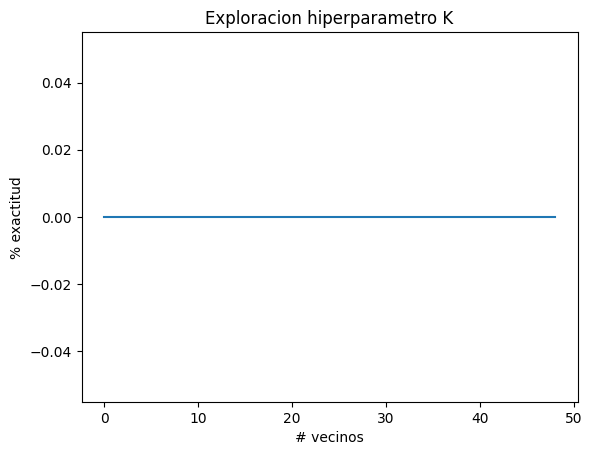

In [23]:
f, ax = plt.subplots(1)
ax.plot(promedio_aciertos_k[1:])
plt.title("Exploracion hiperparametro K")
ax.set_xlabel("# vecinos")
ax.set_ylabel("% exactitud")
f.savefig('../results/figures/exploracion_param_k.png', bbox_inches='tight')


In [5]:
X_train, y_train, X_test, y_test = document_term_matrix(import_data(), Q)
promedio_aciertos_k = four_fold_cross_validation_k_exploration(X_train, y_train, 6)

In [6]:
print(promedio_aciertos_k)

[0. 0. 0. 0. 0. 0.]


In [7]:
print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)

X_train, y_train, X_test, y_test = document_term_matrix(import_data(), Q)
X_newtrain, X_dev, y_newtrain, y_dev = separate_dev_data(X_train, y_train, 3)
print()
print("X_newtrain: ", X_newtrain.shape)
print("X_dev:      ", X_dev.shape)
print("y_newtrain: ", y_newtrain.shape)
print("y_dev:      ", y_dev.shape)

X_train:  (320, 5500)
y_train:  (320, 1)

X_newtrain:  (240, 5500)
X_dev:       (80, 5500)
y_newtrain:  (240, 1)
y_dev:       (80, 1)


In [8]:
for i in range(4):
    print(i)

0
1
2
3
